<a href="https://colab.research.google.com/github/Osipov20306/NSU_ML_OSIPOV/blob/main/LAB2/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Команда для загрузки**

In [ ]:
pip install ucimlrepo

# **Библиотеки**

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score

# **DataFrame**

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
Y = wine.data.targets # убрал таргеты в y

df = pd.concat([Y,X], axis=1)

df.head()

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.tail(5)

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


# **Информация по таблице:**
**нули; типы данных; семплы**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malicacid                     178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  0D280_0D315_of_diluted_wines  178 non-null    float64
 13  Proli

# **Распределения**. Способ интерпретации матрицы следующий:

**Распределение каждой переменной показано в виде гистограммы в диагональных** **прямоугольниках. Во всех остальных полях отображается диаграмма рассеяния** **отношений между каждой парной комбинацией переменных.**

Диагональные элементы имеют нормальное распределение

<function matplotlib.pyplot.show(close=None, block=None)>

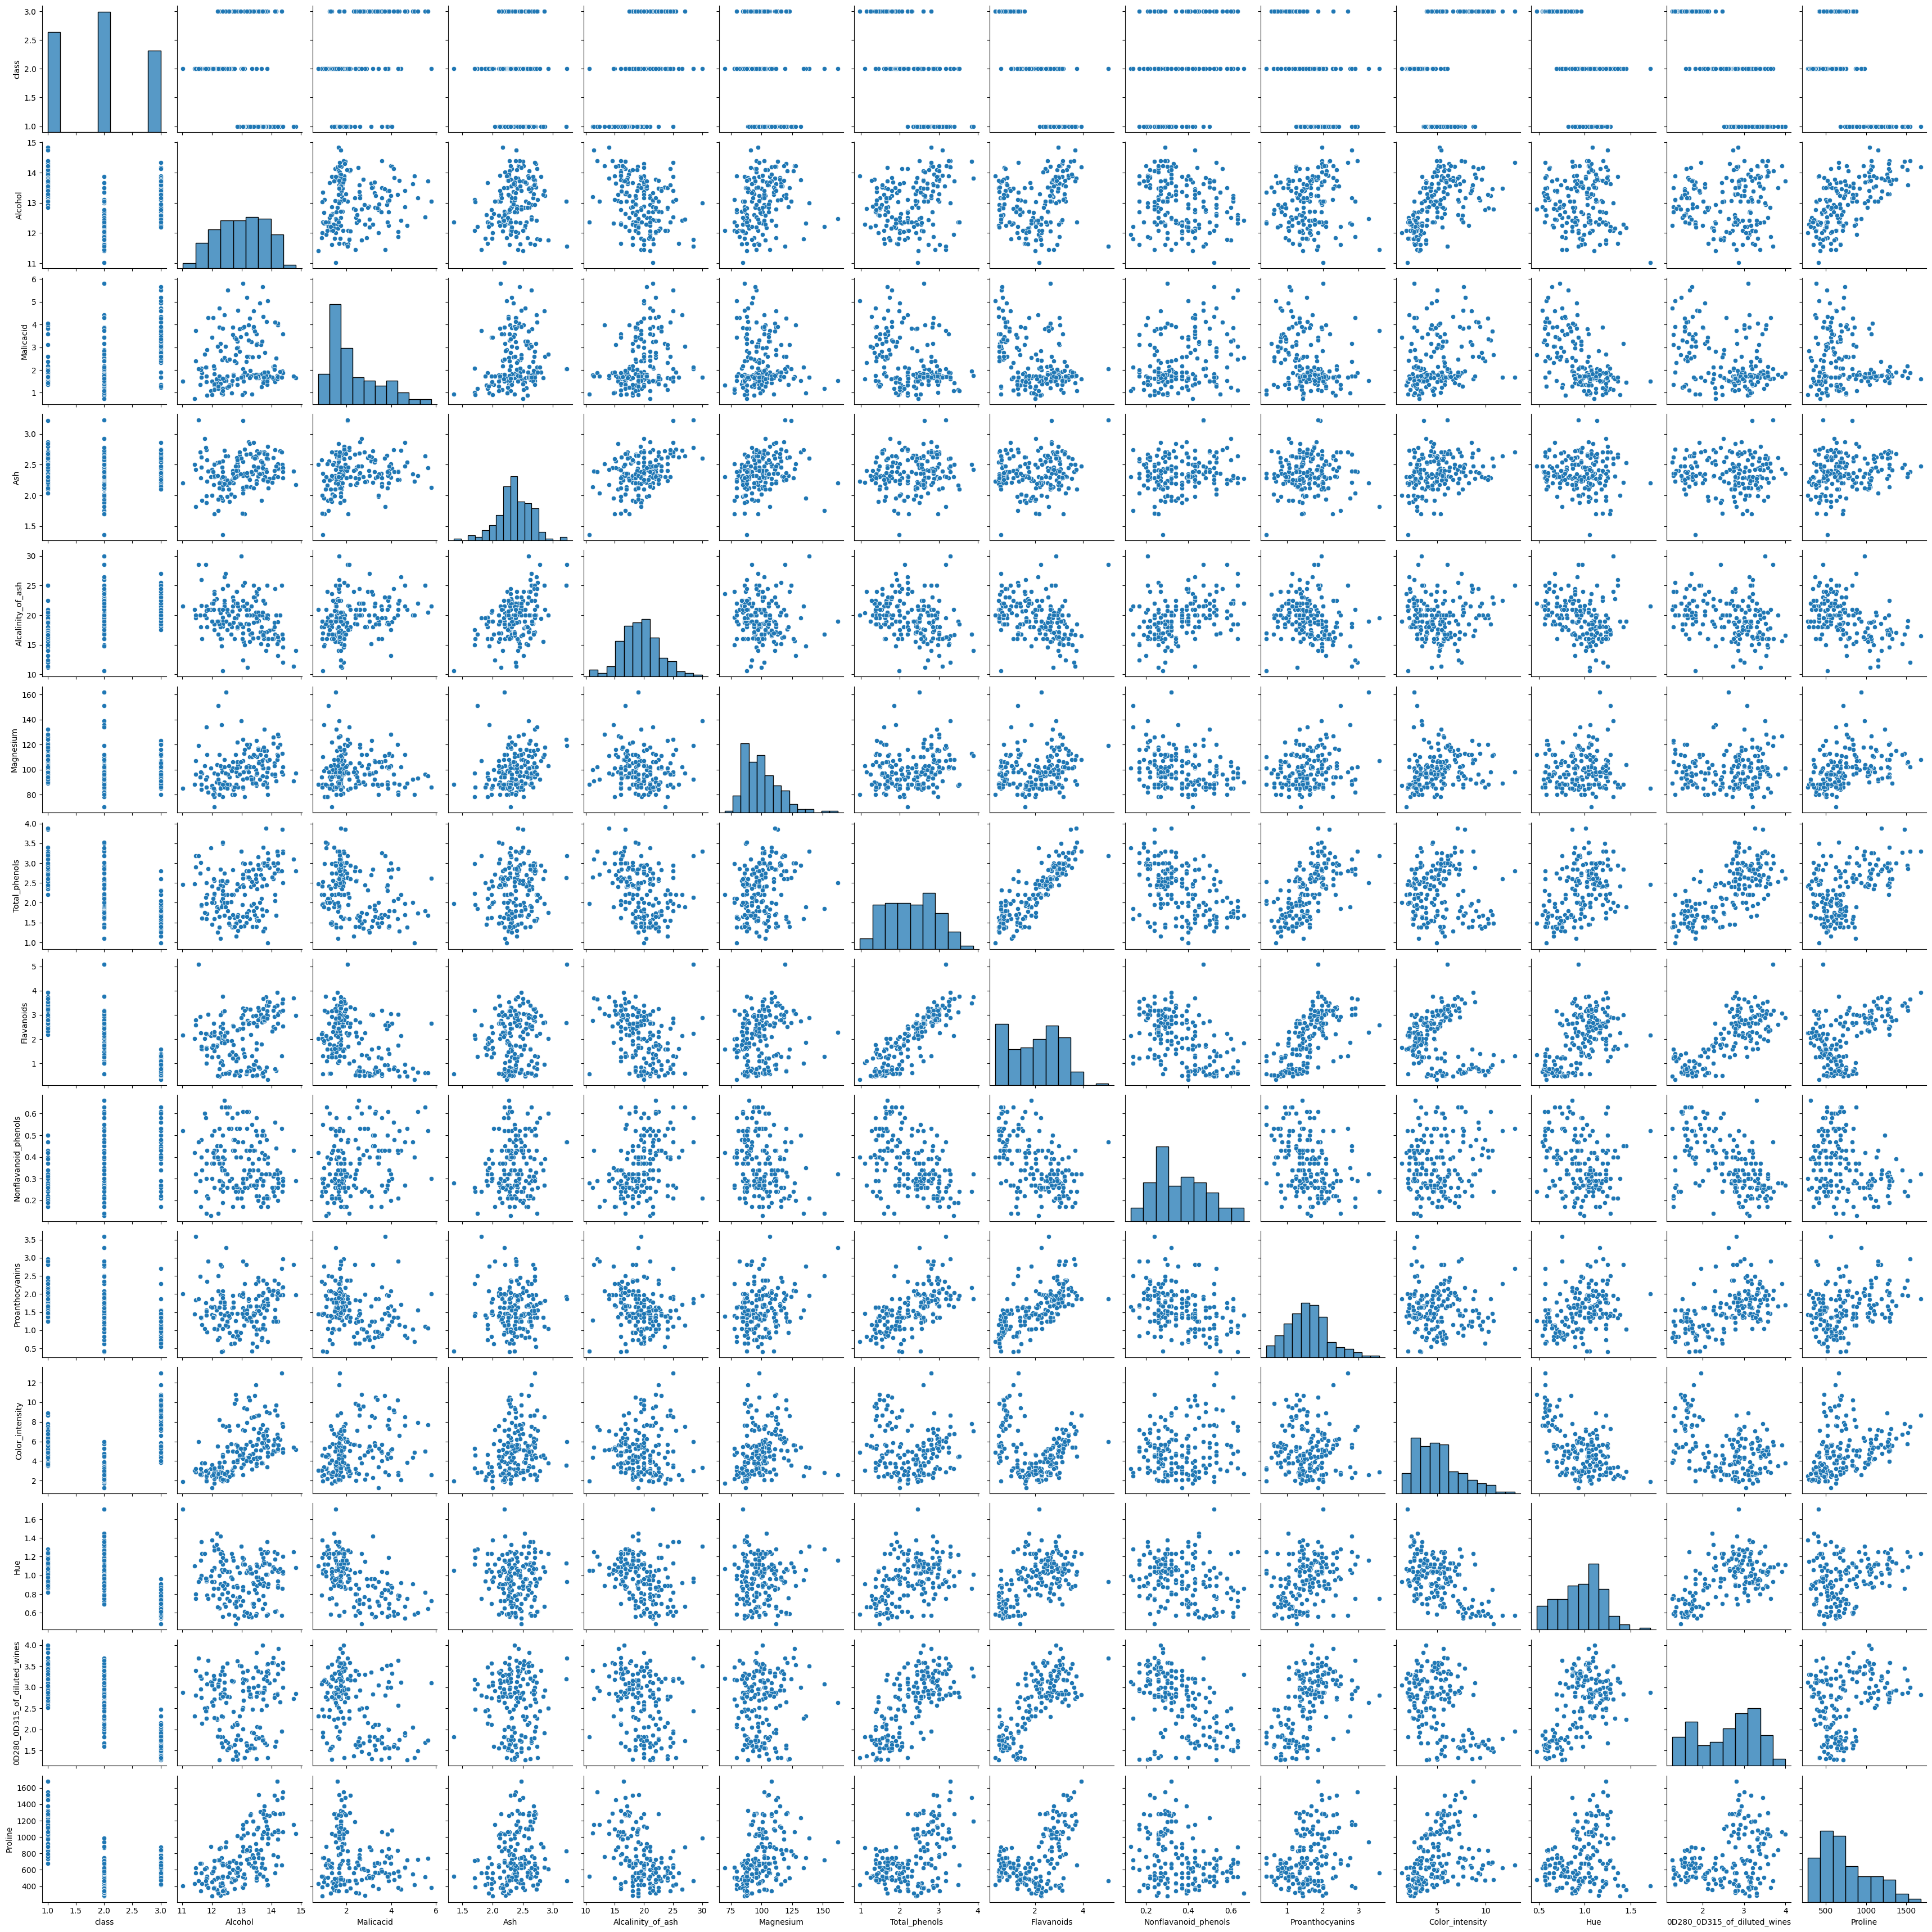

In [ ]:
sns.pairplot(df)
plt.show

# **Корреляция**. Наибольшей корреляцией обладают Flavanoids и Total_phenols. Наименьшей (на мой выбор) - Malicacid и Hue

<Axes: >

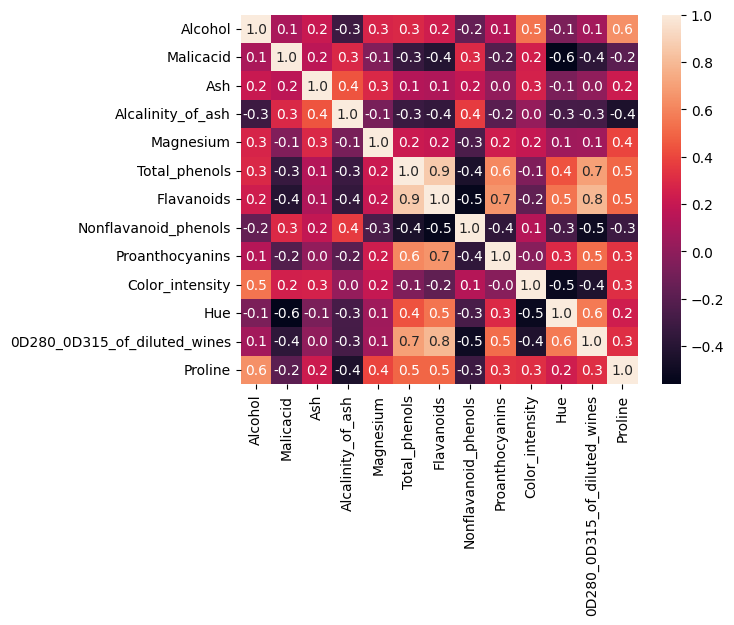

In [ ]:
corr_matrix = X.corr()
sns.heatmap(corr_matrix,annot=True, fmt=".1f")

# **Тренировка, DecisionTree, метрики:**


Метрики для двух максимально коррелирующих:
Accuracy: 0.75
Precision: [0.78571429 0.66666667 0.85714286]
Recall: [0.78571429 0.71428571 0.75      ]
F1 Score: [0.78571429 0.68965517 0.8       ]

Метрики для двух максимально НЕ коррелирующих:
Accuracy: 0.6388888888888888
Precision: [0.72727273 0.55555556 0.71428571]
Recall: [0.57142857 0.71428571 0.625     ]
F1 Score: [0.64       0.625      0.66666667]

Confusion Matrix максимально коррелирующих:
[[11  3  0]
 [ 3 10  1]
 [ 0  2  6]]

Confusion Matrix максимально НЕ коррелирующих:
[[ 8  5  1]
 [ 3 10  1]
 [ 0  3  5]]


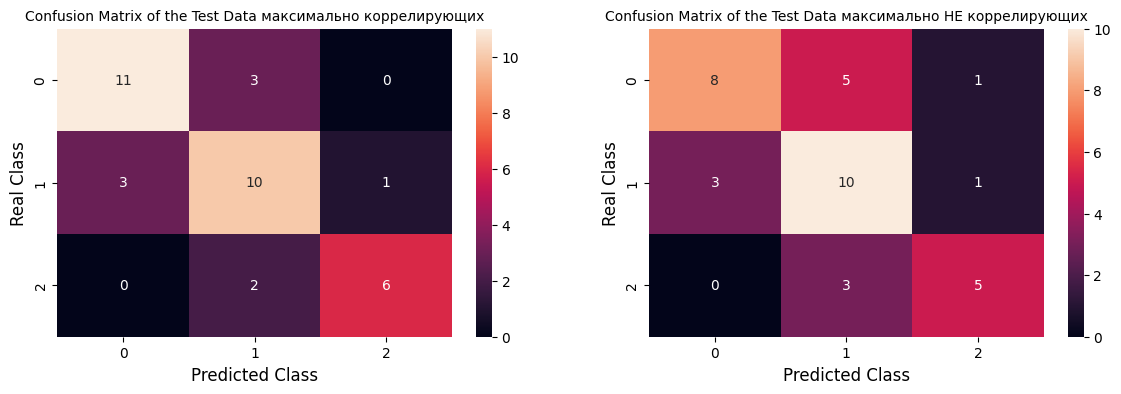

In [ ]:
X_selected_max = X[['Total_phenols','Flavanoids']]
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(X_selected_max, Y, test_size=0.2, random_state=42)

X_selected_min = X[['Malicacid','Hue']]
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(X_selected_min, Y, test_size=0.2, random_state=42)

# Обучение модели Decision Tree
clf_max = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_max.fit(X_train_max, y_train_max)

clf_min = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_min.fit(X_train_min, y_train_min)

# Предсказание на тестовом наборе
y_pred_max = clf_max.predict(X_test_max)

y_pred_min = clf_min.predict(X_test_min)

# Вычисление метрик
accuracy_for_max = accuracy_score(y_test_max, y_pred_max)
precision_for_max = precision_score(y_test_max, y_pred_max, average=None)
recall_for_max = recall_score(y_test_max, y_pred_max, average=None)
f1_for_max = f1_score(y_test_max, y_pred_max, average=None)

accuracy_for_min = accuracy_score(y_test_min, y_pred_min)
precision_for_min = precision_score(y_test_min, y_pred_min, average=None)
recall_for_min = recall_score(y_test_min, y_pred_min, average=None)
f1_for_min = f1_score(y_test_min, y_pred_min, average=None)

# Вывод метрик
print("\nМетрики для двух максимально коррелирующих:")
print("Accuracy:", accuracy_for_max)
print("Precision:", precision_for_max)
print("Recall:", recall_for_max)
print("F1 Score:", f1_for_max)

print("\nМетрики для двух максимально НЕ коррелирующих:")
print("Accuracy:", accuracy_for_min)
print("Precision:", precision_for_min)
print("Recall:", recall_for_min)
print("F1 Score:", f1_for_min)

# Построение Confusion Matrix
conf_matrix_max = confusion_matrix(y_test_max, y_pred_for_max)
print("\nConfusion Matrix максимально коррелирующих:")
print(conf_matrix_for_max)

conf_matrix_min = confusion_matrix(y_test_min, y_pred_for_min)
print("\nConfusion Matrix максимально НЕ коррелирующих:")
print(conf_matrix_for_min)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_max, annot=True, fmt='g')
plt.title('Confusion Matrix of the Test Data максимально коррелирующих', fontsize=10)
plt.ylabel('Real Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_min, annot=True, fmt='g')
plt.title('Confusion Matrix of the Test Data максимально НЕ коррелирующих', fontsize=10)
plt.ylabel('Real Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()

# **SVM, метрики:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=None)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train.values.ravel())

svm_pred = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average=None)
svm_recall = recall_score(y_test, svm_pred, average=None)
svm_f1 = f1_score(y_test, svm_pred, average=None)

print("Метрики для SVM:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)

Метрики для SVM:
Accuracy: 0.8888888888888888
Precision: [0.77777778 0.93333333 0.91666667]
Recall: [0.875      0.82352941 1.        ]
F1 Score: [0.82352941 0.875      0.95652174]


# **roc curve:**

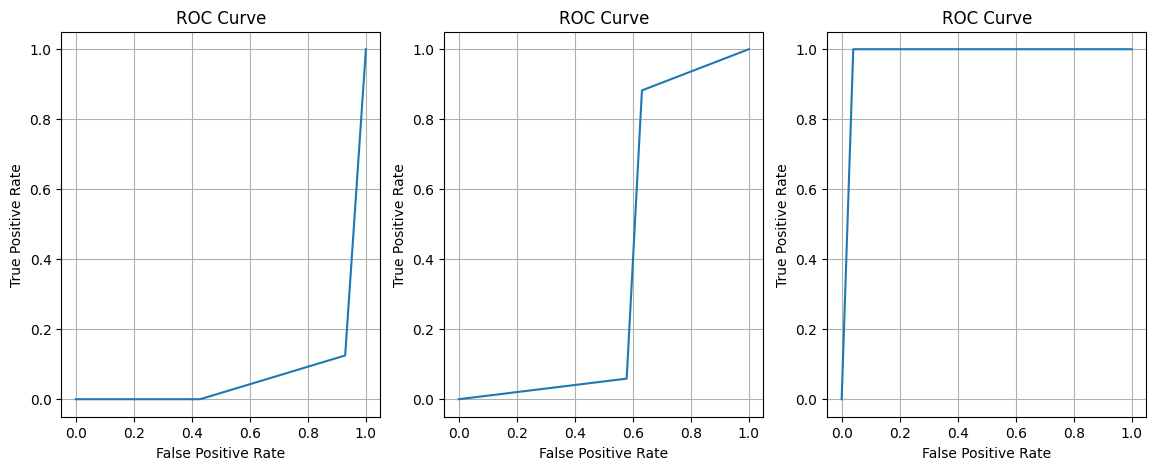

In [ ]:
plt.figure(figsize=(14, 5))

for k in range(3):

    # Вычисление ROC Curve
    svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_pred,pos_label=(k+1))

    plt.subplot(1, 3, k+1)
    plt.plot(svm_fpr, svm_tpr, linestyle='-', label={k})
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.grid(True)

plt.show()